In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import random
import matplotlib.cm as cm
from IPython import display
from copy import copy, deepcopy
import time
from collections import Counter
from tqdm import tqdm
import pickle  # To save and load results

# Problem 1 Code

In [2]:
#part a - note this is the code given and running to ensure everything is smooth, check part b for new things implemented
N = 100 #100 #200  #1000

p_e = 0.06 # probability of edge generation (connection between two people)
p_i = 0.1 # 0.5 # infection probability per contact
p_r = 0.1  # recovery probability

R0 = (N - 1) * p_e * p_i / p_r
print(R0)

prev = []    # prevalence (total infected nodes/total nodes) in the network model
prev_mf = [] # prevalence (total infected nodes/total nodes) in the mean field model
susc_mf = [] # fraction of nodes that are susceptible in the mean field model


# Notes to try
# - adjust number of nodes but leave pe same
# - try slowing down dynamics and see if captures better
# - adjust number of nodes but reduce pe to get same overall connectivity
# - try big numbers of edges
# - try different R0 values (bigger and smaller approaching <1 and then <1)
# - etc.

5.9399999999999995


In [85]:
def initialize():
    global g, nextg, prev, prev_mf, susc_mf

    # Initialize network model
    g = nx.erdos_renyi_graph(N, p_e)       
    g.pos = nx.spring_layout(g)
    nx.set_node_attributes(g, 0, 'state')  # everyone starts off susceptible
    g.nodes[1]['state'] = 1                 # set one node to be infected (index case)
    g.nodes[2]['state'] = 1
    g.nodes[3]['state'] = 1
    g.nodes[4]['state'] = 1
    nextg = g.copy()
    nextg.pos = g.pos
    prev.append(4/len(g.nodes)) # initial prevalence in the real graph

    # Initialize mean field model
    susc_mf.append((N-4)/N) # initial susceptible fraction in the mean field model
    prev_mf.append(4/N) # initial prevalence in the mean field model

In [86]:
def update():
    global g, nextg, prev, prev_mf, susc_mf

    # Update network model
    curprev = 0
    nextg = g.copy()
    nextg.pos = g.pos
    for a in g.nodes:
        if g.nodes[a]['state'] == 0: # if susceptible
            nextg.nodes[a]['state'] = 0
            for b in g.neighbors(a):
                if g.nodes[b]['state'] == 1: # if neighbor b is infected
                    if random.random() < p_i:
                        nextg.nodes[a]['state'] = 1
        elif g.nodes[a]['state'] ==1: # if infected
            curprev += 1
            nextg.nodes[a]['state'] = 2 if random.random() < p_r else 1
    prev.append(curprev/len(g.nodes()))
    g = nextg.copy()
    g.pos = nextg.pos

    # Update mean field model
    susc_mf.append(susc_mf[-1] - (N-1)*p_e*p_i*prev_mf[-1]*susc_mf[-1])
    prev_mf.append(prev_mf[-1] + (N-1)*p_e*p_i*prev_mf[-1]*susc_mf[-1] - p_r*prev_mf[-1])

In [87]:
def observe():
    global g, prev, prev_mf, susc_mf
    cla()
    nx.draw(g, cmap = cm.plasma, vmin = 0, vmax = 2,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

In [7]:
prev = []    # prevalence (total infected nodes/total nodes) in the network model
prev_mf = [] # prevalence (total infected nodes/total nodes) in the mean field model
susc_mf = [] # fraction of nodes that are susceptible in the mean field model

initialize()
for i in range(25):
    update()
  #observe()
  #display.clear_output(wait=True)
  #display.display(gcf())
  #time.sleep(0.5)

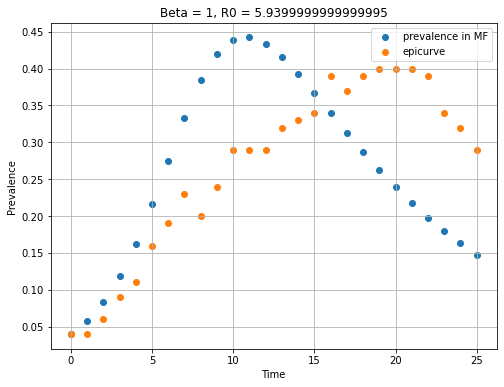

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(prev_mf)), prev_mf, label = 'prevalence in MF')
plt.scatter(range(len(prev)), prev, label = 'epicurve')
plt.xlabel("Time")
plt.ylabel("Prevalence")
plt.title(f"Beta = 1, R0 = {R0}")
plt.legend(loc = 'best')
plt.grid(True)

In [15]:
#part b

def initialize():
    global g, nextg, prev, prev_mf, susc_mf

    # Initialize network model
    g = nx.watts_strogatz_graph(N, round((N-1)*p_e), 0.5)        # WS graph
    g.pos = nx.spring_layout(g)
    nx.set_node_attributes(g, 0, 'state')  # everyone starts off susceptible
    g.nodes[1]['state'] = 1                 # set one node to be infected (index case)
    g.nodes[2]['state'] = 1
    g.nodes[3]['state'] = 1
    g.nodes[4]['state'] = 1
    nextg = g.copy()
    nextg.pos = g.pos
    prev.append(4/len(g.nodes)) # initial prevalence in the real graph

    # Initialize mean field model
    susc_mf.append((N-4)/N) # initial susceptible fraction in the mean field model
    prev_mf.append(4/N) # initial prevalence in the mean field model
    

def update():
    global g, nextg, prev, prev_mf, susc_mf

    # Update network model
    curprev = 0
    nextg = g.copy()
    nextg.pos = g.pos
    for a in g.nodes:
        if g.nodes[a]['state'] == 0: # if susceptible
            nextg.nodes[a]['state'] = 0
            for b in g.neighbors(a):
                if g.nodes[b]['state'] == 1: # if neighbor b is infected
                    if random.random() < p_i:
                        nextg.nodes[a]['state'] = 1
        elif g.nodes[a]['state'] ==1: # if infected
            curprev += 1
            nextg.nodes[a]['state'] = 2 if random.random() < p_r else 1
    prev.append(curprev/len(g.nodes()))
    g = nextg.copy()
    g.pos = nextg.pos

    # Update mean field model
    susc_mf.append(susc_mf[-1] - (N-1)*p_e*p_i*prev_mf[-1]*susc_mf[-1])
    prev_mf.append(prev_mf[-1] + (N-1)*p_e*p_i*prev_mf[-1]*susc_mf[-1] - p_r*prev_mf[-1])
    

def observe():
    global g, prev, prev_mf, susc_mf
    cla()
    nx.draw(g, cmap = cm.plasma, vmin = 0, vmax = 2,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

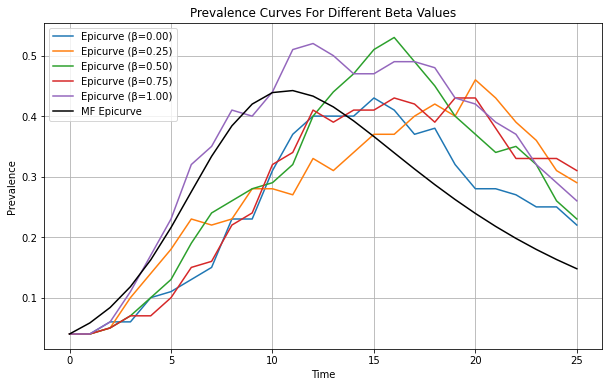

In [16]:
saved_prev_mf = prev_mf.copy()

beta_values = np.linspace(0, 1, 5) 
all_prev = {}  # Dictionary to store prevalence data for each beta
all_prev_mf = {}

for beta in beta_values:
    prev = []    # Prevalence in the network model
    prev_mf = [] # Prevalence in the mean field model
    susc_mf = [] # Susceptible fraction in the mean field model
    
    initialize()  # Reinitialize for each beta
    for i in range(25):
        update()

    all_prev[beta] = prev
    all_prev_mf[beta] = prev_mf

plt.figure(figsize=(10, 6))

for beta in beta_values:
    plt.plot(range(len(all_prev[beta])), all_prev[beta], label=f'Epicurve (β={beta:.2f})')

# Overlay the initially saved prev_mf
plt.plot(range(len(saved_prev_mf)), saved_prev_mf, label="MF Epicurve", color='black')
plt.xlabel("Time")
plt.ylabel("Prevalence")
plt.title("Prevalence Curves For Different Beta Values")
plt.legend(loc="best")
plt.grid(True)

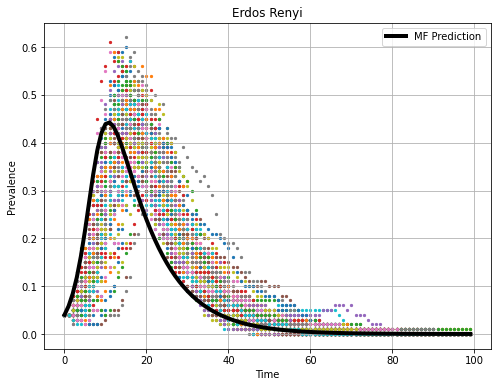

In [74]:
#part c
timesteps = 100
numruns = 100
prevarray = np.zeros([timesteps,numruns])

plt.figure(figsize=(8, 6))
for i in range(0,numruns):
    prev = []    # prevalence (total infected nodes/total nodes) in the network model
    prev_mf = [] # prevalence (total infected nodes/total nodes) in the mean field model
    susc_mf = [] # fraction of nodes that are susceptible in the mean field model
    initialize()
    for j in range(1,timesteps):
        update()
    prevarray[:,i] = prev
    plt.scatter(range(timesteps), prev, s=5)
plt.plot(range(timesteps),prev_mf,'k', linewidth=4, label = 'MF Prediction')
plt.xlabel("Time")
plt.ylabel("Prevalence")
plt.title("Erdos Renyi")
plt.legend(loc = 'best')
plt.grid(True)

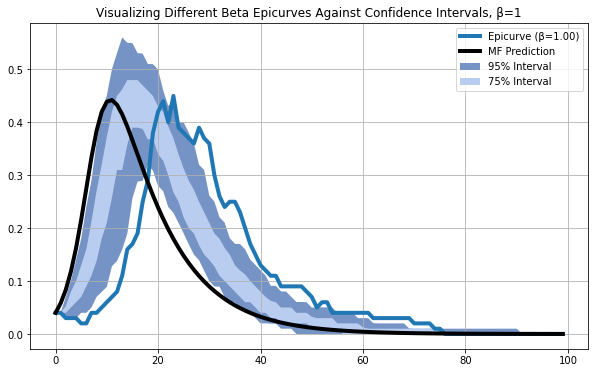

In [84]:
#part d
saved_prev_mf = prev_mf.copy()

beta_value = 1

prev = []    # Prevalence in the network model
prev_mf = [] # Prevalence in the mean field model
susc_mf = [] # Susceptible fraction in the mean field model
    
initialize()  # Reinitialize for each beta
for i in range(timesteps):
    update()

plt.figure(figsize=(10, 6))

#plt.plot(range(len(prev)), prev, label=f'Epicurve (β={beta_value:.2f})')
plt.fill_between(range(timesteps), np.quantile(prevarray, .05, axis = 1), np.quantile(prevarray, 0.95, axis = 1), facecolor='#7593C4', label = '95% Interval')
plt.fill_between(range(timesteps), np.quantile(prevarray, .25, axis = 1), np.quantile(prevarray, .75, axis = 1), facecolor='#B8CDEF', label = '75% Interval')
plt.plot(range(timesteps), prev[:-1], linewidth=4, label = f'Epicurve (β={beta_value:.2f})')
plt.plot(range(timesteps), prev_mf[:-1],'k', linewidth=4, label = 'MF Prediction')
plt.legend(loc = 'best')
plt.title(f'Visualizing Different Beta Epicurves Against Confidence Intervals, β={beta_value}')
plt.grid(True)

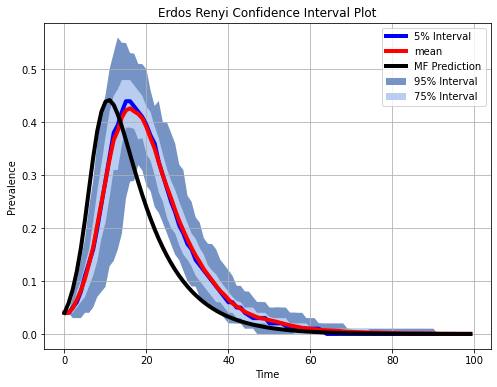

In [91]:
#part e
plt.figure(figsize=(8, 6))
plt.fill_between(range(timesteps), np.quantile(prevarray, .05, axis = 1), np.quantile(prevarray, .95, axis = 1), facecolor='#7593C4', label = '95% Interval')
plt.fill_between(range(timesteps), np.quantile(prevarray, .25, axis = 1), np.quantile(prevarray, .75, axis = 1), facecolor='#B8CDEF', label = '75% Interval')
plt.plot(range(timesteps), np.quantile(prevarray, .5, axis = 1), 'b',linewidth = 4, label = '5% Interval')
plt.plot(range(timesteps), np.mean(prevarray,axis = 1), 'r',linewidth = 4, label = 'mean')
#plt.plot(range(timesteps), 
plt.plot(range(timesteps), prev_mf[:-1],'k', linewidth=4, label = 'MF Prediction')
plt.xlabel("Time")
plt.ylabel("Prevalence")
plt.title("Erdos Renyi Confidence Interval Plot")
plt.legend(loc = 'best')
plt.grid(True)

In [67]:
range(len(prev))

range(0, 101)

# Problem 2 Code

In [2]:
#parts a and b: using power grid model with barabasi-albert model

N, m = 100, 2
mean, std = 100, 10
timesteps = 20

# Data storage
state_history = []  # List to store (num_true, num_false) per timestep

def initialize():
    global g, nextg

    # Initialize network model
    g = nx.barabasi_albert_graph(N, m)
    g.pos = nx.spring_layout(g)
    nx.set_node_attributes(g, True, 'state') 
    nx.set_node_attributes(g, 0, 'capacity')  
    nx.set_node_attributes(g, 0, 'load') 
    for i in g.nodes:
        g.nodes[i]['capacity'] = np.random.normal(mean, std)
        g.nodes[i]['load'] = np.random.uniform(0.8, 1) * g.nodes[i]['capacity']
    
    # Making one random node fail
    random_node = random.choice(list(g.nodes))
    g.nodes[random_node]['load'] = 1 + g.nodes[random_node]['capacity'] 

def update():
    global g, nextg

    # Update network model
    nextg = g.copy()
    nextg.pos = g.pos
    for a in g.nodes:
        if g.nodes[a]['state']:  # If running
            if g.nodes[a]['load'] > g.nodes[a]['capacity']:  # Overloaded
                nextg.nodes[a]['state'] = False
                nn = g.degree(a)
                if nn > 0:  # Avoid division by zero
                    shared_load = g.nodes[a]['load'] / nn
                    for b in g.neighbors(a):
                        nextg.nodes[b]['load'] += shared_load

    g = nextg.copy()
    g.pos = nextg.pos

def observe():
    global g, prev
    plt.cla()
    nx.draw(g, cmap = cm.plasma, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)    

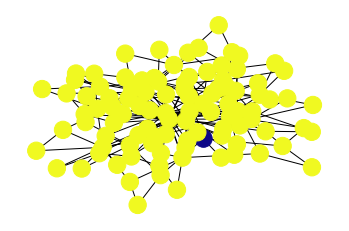

In [3]:
initialize()
observe()
update()
observe()

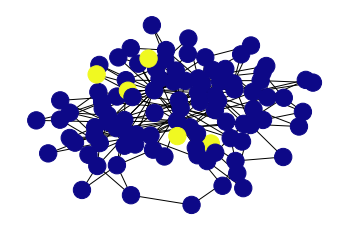

In [4]:
initialize()
for i in range(timesteps):
    update()

observe()

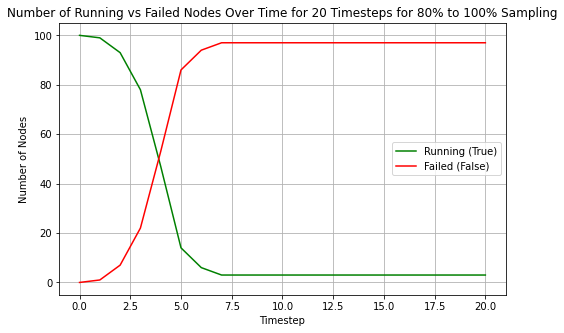

In [5]:
# Run simulation

initialize()

# Store initial state before simulation
states = [g.nodes[node]['state'] for node in g.nodes]
state_counts = Counter(states)
state_history.append((state_counts.get(True, 0), state_counts.get(False, 0)))  

for i in range(timesteps):
    update()
    
    # Store state counts at each timestep
    states = [g.nodes[node]['state'] for node in g.nodes]
    state_counts = Counter(states)
    state_history.append((state_counts.get(True, 0), state_counts.get(False, 0)))  

# Extract counts for plotting
true_counts, false_counts = zip(*state_history)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(range(timesteps + 1), true_counts, label="Running (True)", color="green")
plt.plot(range(timesteps + 1), false_counts, label="Failed (False)", color="red")
plt.xlabel("Timestep")
plt.ylabel("Number of Nodes")
plt.legend()
plt.title(f"Number of Running vs Failed Nodes Over Time for {timesteps} Timesteps for 80% to 100% Sampling")
plt.grid(True)


In [67]:
#parts c and on: using Newman data

def initialize():
    global g, nextg

    # Initialize network model
    g = nx.read_gml('power.gml',label='id')
    g.pos = nx.spectral_layout(g)
    nx.set_node_attributes(g, True, 'state')
    nx.set_node_attributes(g, 0, 'capacity') 
    nx.set_node_attributes(g, 0, 'load')  
    for i in g.nodes:
        g.nodes[i]['capacity'] = np.random.normal(mean, std)
        g.nodes[i]['load'] = np.random.uniform(0.5, 1)*g.nodes[i]['capacity']
    random_node = random.choice(list(g.nodes))
    g.nodes[random_node]['load'] = 1 + g.nodes[random_node]['capacity'] #making one node chosen at random have its load greater compared to the rest
    print(f"total nodes: {g.number_of_nodes()}")
    
def update():
    global g, nextg

    # Update network model
    nextg = g.copy()
    nextg.pos = g.pos
    for a in g.nodes:
        if g.nodes[a]['state']: # if running
              if(g.nodes[a]['load']>g.nodes[a]['capacity']):
                nextg.nodes[a]['state'] = False
                nn = g.degree(a)
                shared_load = g.nodes[a]['load']/nn
                for b in g.neighbors(a):
                    nextg.nodes[b]['load'] += shared_load
    g = nextg.copy()
    g.pos = nextg.pos

def observe():
    global g, prev
    plt.cla()
    nx.draw(g, cmap = cm.plasma, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

total nodes: 4941


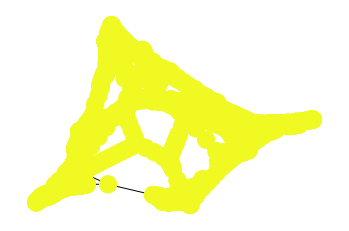

In [68]:
initialize()
observe()
update()
observe()

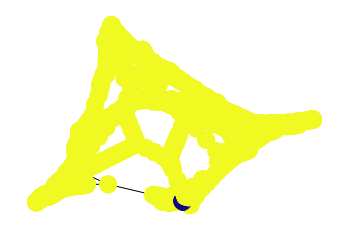

In [43]:
initialize()
for i in range(timesteps):
    update()
observe()

In [44]:
states = [data['state'] for node, data in g.nodes(data=True)]
state_counts = Counter(states)
print(state_counts)
print(state_counts[0])

Counter({True: 4876, False: 65})
65


In [64]:
#part d - I know this is unorthodox but when I wrote a for loop it actually never ran so I'm manually saving the data after each run

try:
    with open("blackout_sizes.pkl", "rb") as f:
        blackout_sizes = pickle.load(f)
except FileNotFoundError:
    blackout_sizes = []

def initialize():
    global g, nextg

    # Initialize network model from Newman dataset
    g = nx.read_gml('power.gml', label='id')
    g.pos = nx.spectral_layout(g)
    nx.set_node_attributes(g, True, 'state')  
    nx.set_node_attributes(g, 0, 'capacity')  
    nx.set_node_attributes(g, 0, 'load')  

    for i in g.nodes:
        g.nodes[i]['capacity'] = np.random.normal(mean, std)
        g.nodes[i]['load'] = np.random.uniform(0.5, 1) * g.nodes[i]['capacity']
    
    random_node = random.choice(list(g.nodes))
    g.nodes[random_node]['load'] = 1 + g.nodes[random_node]['capacity']  

def update():
    global g, nextg

    nextg = g.copy()
    nextg.pos = g.pos
    for a in g.nodes:
        if g.nodes[a]['state']:  # If running
            if g.nodes[a]['load'] > g.nodes[a]['capacity']:  # Overloaded
                nextg.nodes[a]['state'] = False
                nn = g.degree(a)
                if nn > 0:  # Avoid division by zero
                    shared_load = g.nodes[a]['load'] / nn
                    for b in g.neighbors(a):
                        nextg.nodes[b]['load'] += shared_load

    g = nextg.copy()
    g.pos = nextg.pos


initialize()
for _ in range(timesteps):
    update()


states = [g.nodes[node]['state'] for node in g.nodes]
state_counts = Counter(states)
blackout_size = state_counts.get(False, 0)  
blackout_sizes.append(blackout_size)


with open("blackout_sizes.pkl", "wb") as f:
    pickle.dump(blackout_sizes, f)

print(f"Simulation complete! Blackout size: {blackout_size}")
print(f"Total simulations so far: {len(blackout_sizes)}/20")


Simulation complete! Blackout size: 73
Total simulations so far: 20/20


Text(0.5, 1.0, 'Histogram of Blackout Sizes over 20 Simulations')

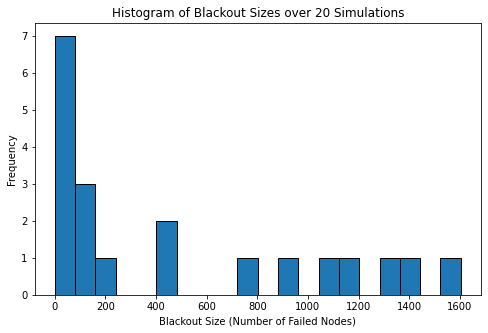

In [65]:
with open("blackout_sizes.pkl", "rb") as f:
    blackout_sizes = pickle.load(f)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(blackout_sizes, bins=20, edgecolor="black")
plt.xlabel("Blackout Size (Number of Failed Nodes)")
plt.ylabel("Frequency")
plt.title(f"Histogram of Blackout Sizes over 20 Simulations")

In [72]:
total_nodes = 4941

percent_nodes = (np.array(blackout_sizes) / total_nodes) * 100
print(percent_nodes)

[3.64298725e-01 3.24428253e+01 2.41853876e+01 1.41671726e-01
 2.15745800e+01 2.65128516e+00 9.02651285e+00 1.01194090e-01
 1.91256831e+01 2.02388181e-02 2.74640761e+01 1.17385145e+00
 2.08459826e+00 2.02388181e-02 1.55434123e+01 3.33940498e+00
 2.76867031e+01 9.18842340e+00 1.98340417e+00 1.47743372e+00]
